<a href="https://colab.research.google.com/github/janeusz2000/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook settings

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as lines
from matplotlib.ticker import MaxNLocator


plt.style.use('ggplot')

custom_color = [
    '#EDC7B7',
    '#EEE2DC',
    '#BAB2B5',
    '#123C69',
    '#AC3B61'
]

plt.rcParams['figure.figsize'] = (9,7)
plt.rcParams['figure.dpi'] = 100
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = custom_color[3]
plt.rcParams["grid.alpha"] = 0.5
plt.rcParams["grid.linestyle"] = '--'
plt.rcParams["font.family"] = "monospace"

plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.frameon'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.linewidth'] = 1

# Kaggle Integration

In [2]:
from google.colab import files
files.upload() # add .json file with token obtained from kaggle

# dont forget to rename it into kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!kaggle competitions download -c 'titanic'


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# DATA TEST

In [5]:
import pandas as pd

from pathlib import Path

## How data is structured

In [6]:
testFile = Path("test.csv")
trainFile = Path("train.csv")
genderSubmissionFile = Path('gender_submission.csv')

assert(trainFile.exists())
train_table = pd.read_csv(trainFile)
test_table = pd.read_csv(testFile)
pd.options.display.max_columns = len(train_table.columns)
train_table.head(900)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
gender_submission_table = pd.read_csv(genderSubmissionFile)
gender_submission_table.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
test_table.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Age Analisis

In [9]:
import math

def count_age(pandasTable) -> dict:
    output = dict()
    for age in pandasTable["Age"]:
        if math.isnan(age):
            continue
        if age in output.keys():
            output[age] += 1
        else:
            output[age] = 1
    return output

def count_age_by_decades(pandasTable) -> dict:
    output = dict()
    for age in pandasTable["Age"]:
        if math.isnan(age):
            continue
        
        age_casted_to_decades = age // 10
        if age_casted_to_decades in output.keys():
            output[age_casted_to_decades] += 1
        else:
            output[age_casted_to_decades] = 1
    return output


In [10]:
survived = train_table[train_table["Survived"] == 1]
not_survived = train_table[train_table["Survived"] == 0]
full_age = train_table

In [11]:
survived_count = count_age(survived)
not_survived_count = count_age(not_survived)
full_count = count_age(full_age)

survived_count_decades = count_age_by_decades(survived)
not_survived_count_decades = count_age_by_decades(not_survived)
full_count_decades = count_age_by_decades(full_age)

In [12]:
def get_survability_percent_per_age(age_counts, full_count):
    output = dict()
    for age_count in age_counts:
        full = full_count[age_count]
        value = age_counts[age_count]
        output[age_count] = float(value) / float(full) * 100
    return output

survived_population = get_survability_percent_per_age(survived_count, full_count)
non_survived_population = get_survability_percent_per_age(not_survived_count, full_count)
survived_population_by_decades = get_survability_percent_per_age(survived_count_decades, full_count_decades)
non_survived_population_by_decades = get_survability_percent_per_age(not_survived_count_decades, full_count_decades)

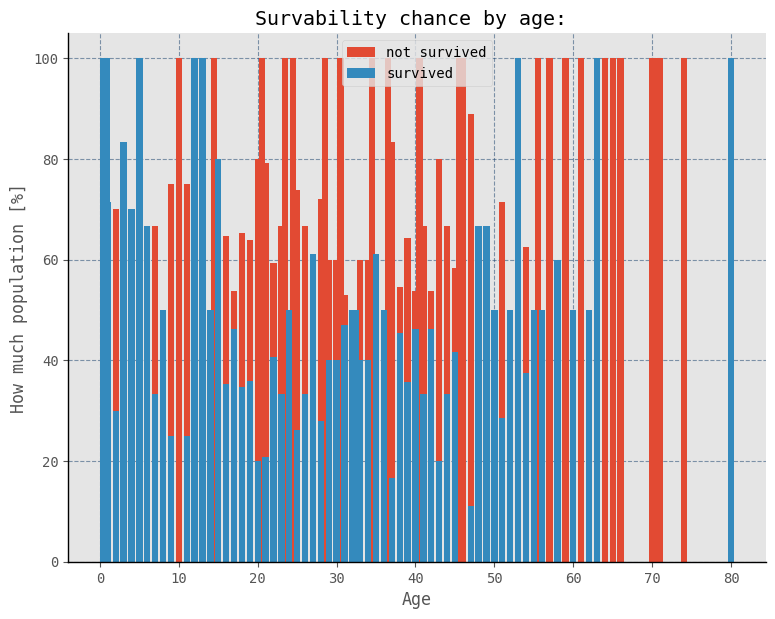

In [13]:
plt.bar([float(number) for number in non_survived_population.keys()], [float(number) for number in non_survived_population.values()])
plt.bar(survived_population.keys(), survived_population.values())
plt.title("Survability chance by age: ")
plt.xlabel("Age")
plt.ylabel("How much population [%]")
plt.legend(["not survived", "survived"])
plt.show()

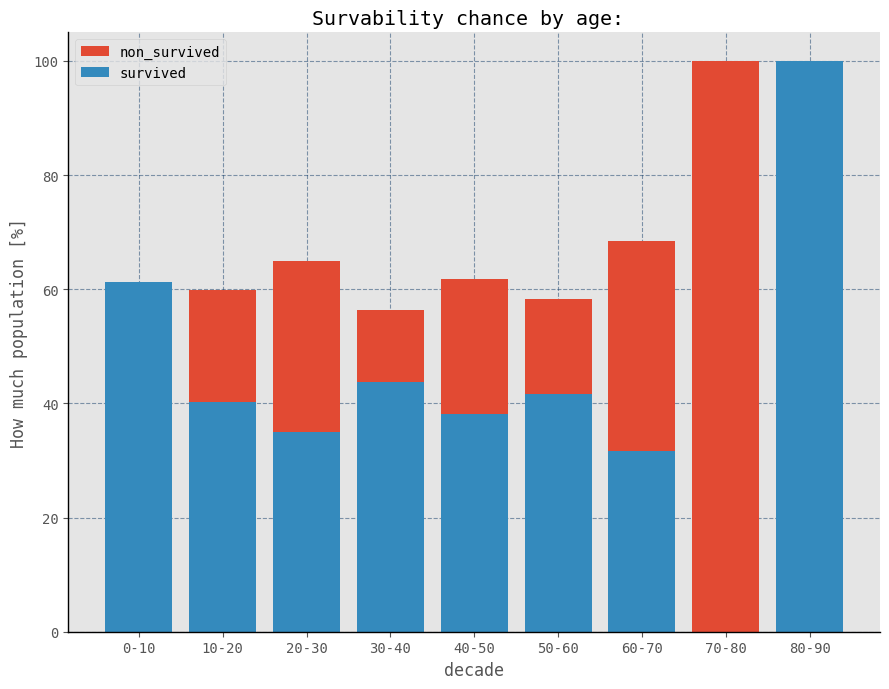

In [14]:
fig, ax = plt.subplots()
ax.bar(non_survived_population_by_decades.keys(), non_survived_population_by_decades.values(), label="non_survived")
ax.bar(survived_population_by_decades.keys(), survived_population_by_decades.values(), label="survived")

ticks = set(non_survived_population_by_decades.keys())
ticks.update(survived_population_by_decades.keys())

ax.set_title("Survability chance by age: ")
ax.set_xlabel("decade")
ax.set_ylabel("How much population [%]")
ax.legend()
labels = [f"{int(decade)*10}-{(int(decade)+1)*10}" for decade in ticks]

ax.set_xticks(list(ticks))
ax.set_xticklabels(labels)

plt.tight_layout()

plt.show()

## Sex Analisis

In [15]:
men_survived = len(survived[survived['Sex'] == "male"])
full_men = len(train_table[train_table['Sex'] == "male"])

woman_survived = len(survived[survived['Sex'] == "female"])
full_woman = len(train_table[train_table['Sex'] == "female"])
print(f"{men_survived} out of {full_men} men survived")
print(f"{woman_survived} out of {full_woman} woman survived")

109 out of 577 men survived
233 out of 314 woman survived


##Location Analisis

In [16]:
train_known_location = train_table[pd.isna(train_table["Cabin"]) == False]
train_known_location.head(900)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


204


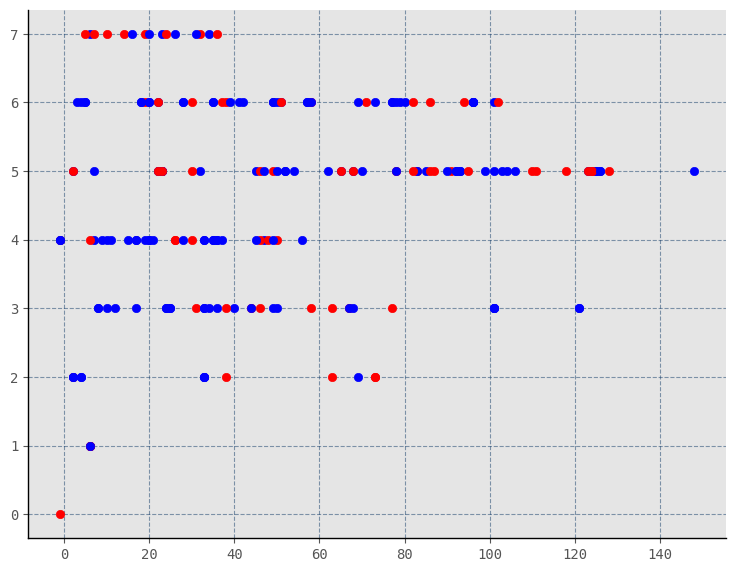

In [17]:
def get_position(input_str: str):
    cabin = input_str
    cabin = cabin.replace(" ", "")
    if not cabin:
        return -1
    if cabin[0] in ["G", "E"]:
        cabin = cabin[1:]
    number_of_characters_eaten = 0
    initial_cabin_length = len(cabin)
    operated = cabin
    while not operated.isnumeric():
        if number_of_characters_eaten >= initial_cabin_length:
            assert(False)

        operated = operated[0: -1]

        number_of_characters_eaten += 1
    return int(operated)

def plot_survability_based_on_location(train_table_with_known_locations: pd.DataFrame):
    output = dict()
    number = 0
    dec_level = {"A" : 7, "B" : 6, "C" : 5, "D" : 4, "E" : 3, "F" : 2, "G" : 1, "T" : 0}
    for index, row in train_table_with_known_locations.iterrows():
        number += 1
        survived = row['Survived']
        cabin = row['Cabin']
        name = row['Name']

        dec = dec_level[cabin[0]]

        position = get_position(cabin[1:])
        
        if survived:
            plt.scatter(x=position, y=dec, color='blue')
        else:
            plt.scatter(x=position, y=dec, color='red')

    print(number)
    plt.show()


plot_survability_based_on_location(train_known_location)
# train_known_location["Cabin"].transform(lambda x: print(x))

##Fare Analisis

In [18]:
fare_survived = train_table[['Survived', 'Fare']]

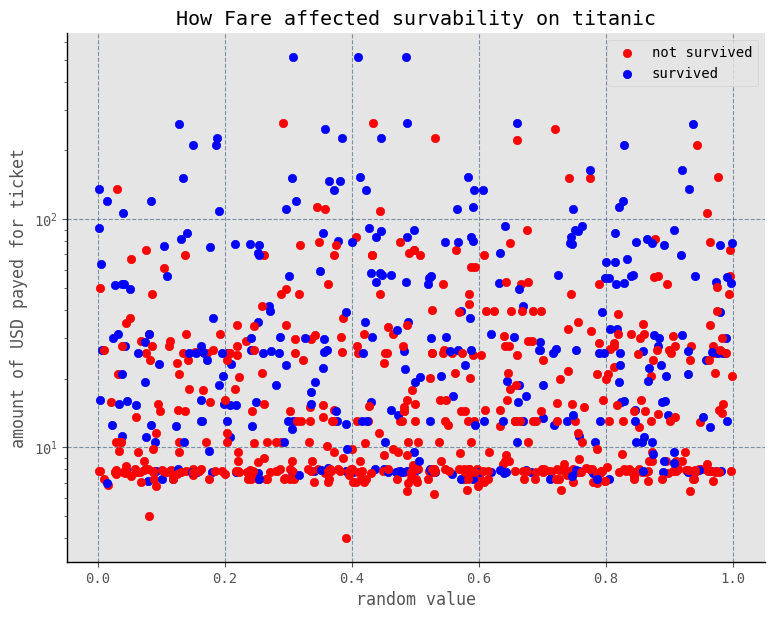

In [19]:
import random

fig, ax = plt.subplots()

for index, row in fare_survived.iterrows():
    survived = row['Survived'] == 1
    fare = row['Fare']
    random_x = random.uniform(0, 1)
    if survived:
        plt.scatter(x=random_x, y=fare, color='blue', label='survived')
    else:
        plt.scatter(x=random_x, y=fare, color='red', label='not survived')
ax.set_yscale('log')
ax.set_xlabel('random value')
ax.set_ylabel('amount of USD payed for ticket')
ax.set_title('How Fare affected survability on titanic')

plt.legend(['not survived', 'survived'])
plt.show()

##Pclass analisis

In [20]:
pclass_survived = train_table[['Pclass', 'Survived']]

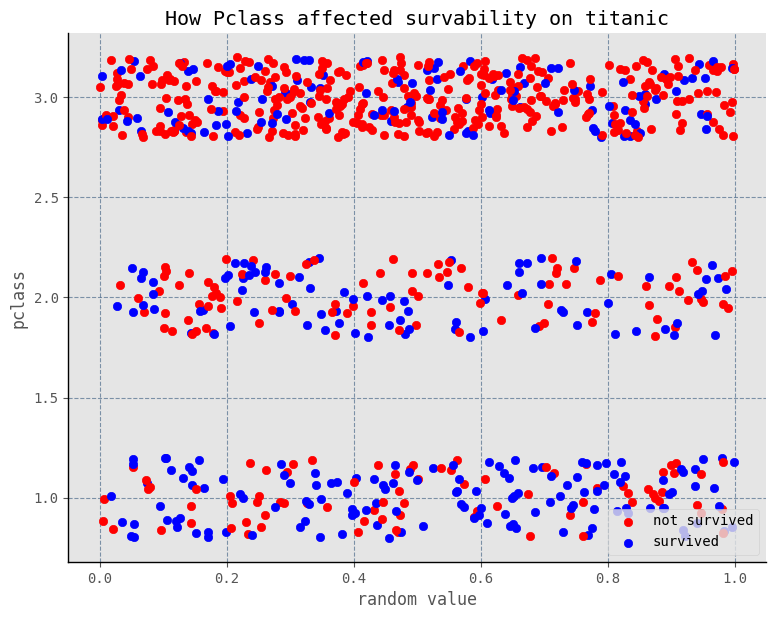

In [21]:
fig, ax = plt.subplots()

for index, row in pclass_survived.iterrows():
    survived = row['Survived'] == 1
    pclass = row['Pclass']
    random_x = random.uniform(0, 1)
    if survived:
        plt.scatter(x=random_x, y=pclass + random.uniform(-.2, .2), color='blue', label='survived')
    else:
        plt.scatter(x=random_x, y=pclass + random.uniform(-.2, .2), color='red', label='not survived')

ax.set_xlabel('random value')
ax.set_ylabel('pclass')
ax.set_title('How Pclass affected survability on titanic')

plt.legend(['not survived', 'survived'])
plt.show()

##CORELATION MATRIX

In [22]:
from typing import Final
NOT_EXISTING_DATA: Final = -1e8

In [23]:
def get_position(input_str: str):
    cabin = input_str
    cabin = cabin.replace(" ", "")
    if not cabin:
        return -1
    if cabin[0] in ["G", "E"]:
        cabin = cabin[1:]
    number_of_characters_eaten = 0
    initial_cabin_length = len(cabin)
    operated = cabin
    while not operated.isnumeric():
        if number_of_characters_eaten >= initial_cabin_length:
            assert(False)

        operated = operated[0: -1]

        number_of_characters_eaten += 1
    return int(operated)

def extract_location_from_cabin(cabin: str) -> dict:
    dec_level = {"A" : 7, "B" : 6, "C" : 5, "D" : 4, "E" : 3, "F" : 2, "G" : 1, "T" : 0}
    dec = dec_level[cabin[0]]
    position = get_position(cabin[1:])

    return {'dec' : dec, 'position' : position}

def extract_location_from_concatenated_location(location_concatenated: pd.DataFrame)->list:
    output = list()
    for row in location_concatenated:
        output_row = dict()
        
        if pd.isna(row):
            output_row = {'dec' : None, 'position' : None}
        else:
            output_row = extract_location_from_cabin(row)
        
        output.append(output_row)
    return output

def extract_embarked_as_float(embarked: pd.Series):
    translation = {'C': 1, 'Q': 0, 'S' : 2., NOT_EXISTING_DATA : NOT_EXISTING_DATA}
    return embarked.transform(lambda x: translation[x])

In [24]:
def create_data_frame(read_csv_frame: pd.DataFrame, survived_included=False) -> pd.DataFrame:
    sexes = read_csv_frame.Sex=='male'
    sexes = sexes.astype('float16')

    if survived_included:
        survived = read_csv_frame.Survived.astype('float16')
    
    age = read_csv_frame.Age.astype('float16')

    young_age = read_csv_frame.Age<=8
    young_age = young_age.astype('float16')

    age.fillna(0, inplace=True)

    has_cabin = read_csv_frame.Cabin.notna()
    has_cabin = has_cabin.astype('float16')

    fare = read_csv_frame.Fare.astype('float16')
    pclass = read_csv_frame.Pclass.astype('float16')

    parch = read_csv_frame.Parch.astype('float16')
    sib_sp = read_csv_frame.SibSp.astype('float16')

    embarked_table = read_csv_frame.Embarked
    embarked_table.fillna(NOT_EXISTING_DATA, inplace=True)
    embarked = extract_embarked_as_float(embarked_table)

    location_concatenated = read_csv_frame.Cabin
    extracted_locations = extract_location_from_concatenated_location(location_concatenated)
    locations = pd.DataFrame(extracted_locations)

    dec = locations.dec
    dec.fillna(-1, inplace=True)

    position = locations.position
    position.fillna(-1, inplace=True)

    if survived_included:
        output_table = {
            'Sex' : sexes.to_dict(),
            'Fare' : fare.to_dict(),
            'Has_cabin' : has_cabin.to_dict(),
            'Age' : age.to_dict(),
            'Young_Age': young_age.to_dict(),
            'Pclass' : pclass.to_dict(),
            'Parch' : parch.to_dict(),
            'Dec' : dec.to_dict(),
            'Position' : position.to_dict(),
            'Survived' : survived.to_dict()}
    else:
        output_table = {
            'Sex' : sexes.to_dict(),
            'Fare' : fare.to_dict(),
            'Has_cabin' : has_cabin.to_dict(),
            'Age' : age.to_dict(),
            'Young_Age': young_age.to_dict(),
            'Pclass' : pclass.to_dict(),
            'Parch' : parch.to_dict(),
            'Dec' : dec.to_dict(),
            'Position' : position.to_dict()}

    tensor = pd.DataFrame(output_table)
    return tensor

In [25]:

sexes = train_table.Sex=='male'
sexes = sexes.astype('float16')

survived = train_table.Survived.astype('float16')
age = train_table.Age.astype('float16')

young_age = train_table.Age<=8
young_age = young_age.astype('float16')

age.fillna(0, inplace=True)

has_cabin = train_table.Cabin.notna()
has_cabin = has_cabin.astype('float16')

fare = train_table.Fare.astype('float16')
pclass = train_table.Pclass.astype('float16')

parch = train_table.Parch.astype('float16')
sib_sp = train_table.SibSp.astype('float16')

embarked_table = train_table.Embarked
embarked_table.fillna(NOT_EXISTING_DATA, inplace=True)
embarked = extract_embarked_as_float(embarked_table)

location_concatenated = train_table.Cabin
extracted_locations = extract_location_from_concatenated_location(location_concatenated)
locations = pd.DataFrame(extracted_locations)

dec = locations.dec
dec.fillna(-1, inplace=True)

position = locations.position
position.fillna(-1, inplace=True)


In [26]:
import seaborn as sn

correlation_matrix_table = {
    'Sex' : sexes.to_dict(),
    'Fare' : fare.to_dict(),
    'Dec' : dec.to_dict(),
    'Position' : position.to_dict(),
    'Has_cabin' : has_cabin.to_dict(),
    'Age' : age.to_dict(),
    'Young_Age': young_age.to_dict(),
    'Pclass' : pclass.to_dict(),
    'Parch' : parch.to_dict(),
    'Embarked' : embarked,
    'SibSp' : sib_sp.to_dict(),
    'Survived' : survived.to_dict()}


In [27]:
correlation_matrix = pd.DataFrame(correlation_matrix_table)
corr_matrix = correlation_matrix.corr()
correlation_matrix.head(900)

,Sex,Fare,Dec,Position,Has_cabin,Age,Young_Age,Pclass,Parch,Embarked,SibSp,Survived
0,1.0,7.250000,-1.0,-1.0,0.0,22.0,0.0,3.0,0.0,2.0,1.0,0.0
1,0.0,71.312500,5.0,85.0,1.0,38.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.0,7.925781,-1.0,-1.0,0.0,26.0,0.0,3.0,0.0,2.0,0.0,1.0
3,0.0,53.093750,5.0,123.0,1.0,35.0,0.0,1.0,0.0,2.0,1.0,1.0
4,1.0,8.046875,-1.0,-1.0,0.0,35.0,0.0,3.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,13.000000,-1.0,-1.0,0.0,27.0,0.0,2.0,0.0,2.0,0.0,0.0
887,0.0,30.000000,6.0,42.0,1.0,19.0,0.0,1.0,0.0,2.0,0.0,1.0
888,0.0,23.453125,-1.0,-1.0,0.0,0.0,0.0,3.0,2.0,2.0,1.0,0.0
889,1.0,30.000000,5.0,148.0,1.0,26.0,0.0,1.0,0.0,1.0,0.0,1.0


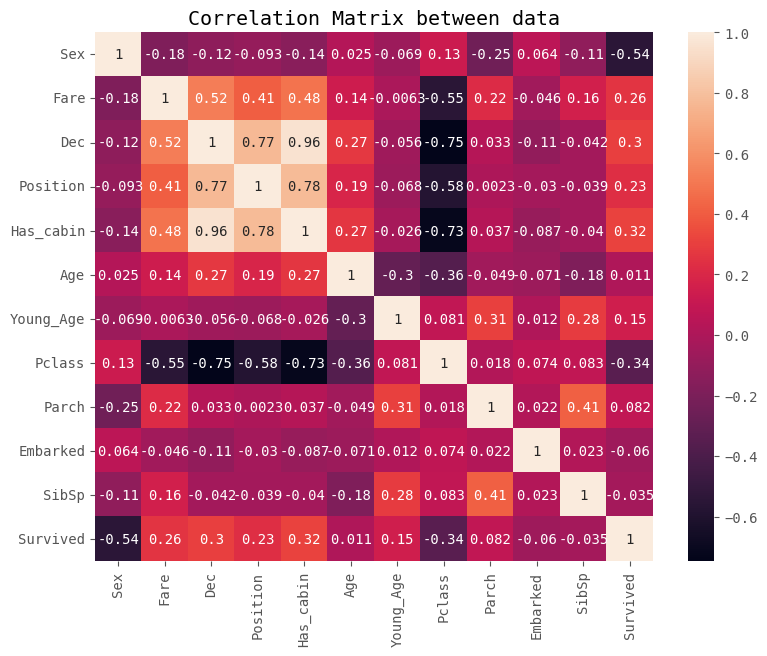

In [28]:

sn.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix between data')
plt.show()

#MODEL DEVELOPMENT

##Utilities

In [29]:
import tensorflow as tf
from typing import Final

## Joining USeful Data Together

In [30]:
tensor = create_data_frame(train_table, survived_included=True)

validation_table = tensor.sample(frac=0.15)
validation_index = validation_table.index
training_table = tensor.drop(validation_index)



In [31]:
training_table.fillna(NOT_EXISTING_DATA, inplace=True)
validation_table.fillna(NOT_EXISTING_DATA, inplace=True)
training_table.head(900)

,Sex,Fare,Has_cabin,Age,Young_Age,Pclass,Parch,Dec,Position,Survived
0,1.0,7.250000,0.0,22.0,0.0,3.0,0.0,-1.0,-1.0,0.0
1,0.0,71.312500,1.0,38.0,0.0,1.0,0.0,5.0,85.0,1.0
2,0.0,7.925781,0.0,26.0,0.0,3.0,0.0,-1.0,-1.0,1.0
4,1.0,8.046875,0.0,35.0,0.0,3.0,0.0,-1.0,-1.0,0.0
5,1.0,8.460938,0.0,0.0,0.0,3.0,0.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
885,0.0,29.125000,0.0,39.0,0.0,3.0,5.0,-1.0,-1.0,0.0
886,1.0,13.000000,0.0,27.0,0.0,2.0,0.0,-1.0,-1.0,0.0
888,0.0,23.453125,0.0,0.0,0.0,3.0,2.0,-1.0,-1.0,0.0
889,1.0,30.000000,1.0,26.0,0.0,1.0,0.0,5.0,148.0,1.0


## Tensor creation

In [32]:
import tensorflow as tf

In [33]:
train_labels = training_table.pop('Survived')
validation_labels = validation_table.pop('Survived')

In [34]:
normalizer = tf.keras.layers.Normalization(axis=-1, name="normalization_layer")
normalizer.adapt(training_table)

In [35]:
def get_model(how_many_neurons: int = 8):
    input_layer = tf.keras.Input(shape=(9), name="input_layer")
    normalization_layer = normalizer(input_layer)
    dense_1st = tf.keras.layers.Dense(how_many_neurons, activation='ReLU', name="dense_1st")(normalization_layer)
    output = tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid, name="output")(dense_1st)

    model = tf.keras.models.Model(input_layer, output)

    model._name = f"Prototype_model"
    return model

In [51]:
import os
from pathlib import Path
from IPython.display import clear_output

def train_model(MODEL_GENERATED_PATH: Path, model, EPOCHS: int = 300):
    SHUFFLE_BUFFER = 500
    BATCH_SIZE = 32


    model.summary()

    train_labels.head()

    checkpoint_filepath =  MODEL_GENERATED_PATH / 'model_epoch_{epoch:02d}_precision_{val_precision:.2f}_acc_{val_accuracy:.2f}_.h5'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)

    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy", tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")])

    history = model.fit(x=training_table,
                        y=train_labels,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        validation_data=(validation_table, validation_labels),
                        callbacks=[model_checkpoint_callback])
    return history
    
def extract_parameter_value(filename: str, separator: str):
    start_index = filename.find(separator)+len(separator)
    end_index = filename.find('_', start_index)
    output = float(filename[start_index : end_index])
    print(output)
    return output

    
    
def extract_good_model(model_generated_path: Path, 
                       good_model_path: Path, 
                       threashold: float = 0.90, 
                       parameter: str = "acc"):

    assert model_generated_path.exists()
    assert good_model_path.exists()

    for filename in os.listdir(model_generated_path):
        path = model_generated_path / filename
        separator = f"_{parameter}_"
        
        parameter_value = extract_parameter_value(filename, separator)

        if parameter_value >= threashold:
            os.replace(path, good_model_path / filename) # move good model into destination

def get_good_models(how_many_attempts: int, good_model_path: Path, EPOCHS: int = 300):

    assert good_model_path.exists()
    for i in range(how_many_attempts):
        !mkdir model_generated
        MODEL_GENERATED_PATH = Path("model_generated")
        assert MODEL_GENERATED_PATH.exists()

        model = get_model(i // 5 + 1)

        history = train_model(MODEL_GENERATED_PATH, model, EPOCHS=EPOCHS)
        extract_good_model(MODEL_GENERATED_PATH, good_model_path, threashold=0.85)
        !rm model_generated/ -rf
        clear_output(wait=True)

        if i == how_many_attempts -1:
            return history

In [52]:
!mkdir good_models

GOOD_MODELS = Path("good_models")
HOW_MANY_ATTEMPTS = 1

history = get_good_models(HOW_MANY_ATTEMPTS, GOOD_MODELS, 10)

mkdir: cannot create directory ‘good_models’: File exists
Model: "Prototype_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 9)]               0         
                                                                 
 normalization_layer (Normal  (None, 9)                19        
 ization)                                                        
                                                                 
 dense_1st (Dense)           (None, 1)                 10        
                                                                 
 output (Dense)              (None, 1)                 2         
                                                                 
Total params: 31
Trainable params: 12
Non-trainable params: 19
_________________________________________________________________
Epoch 1/10
24/24 [==============================] - 2s 20ms/st

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


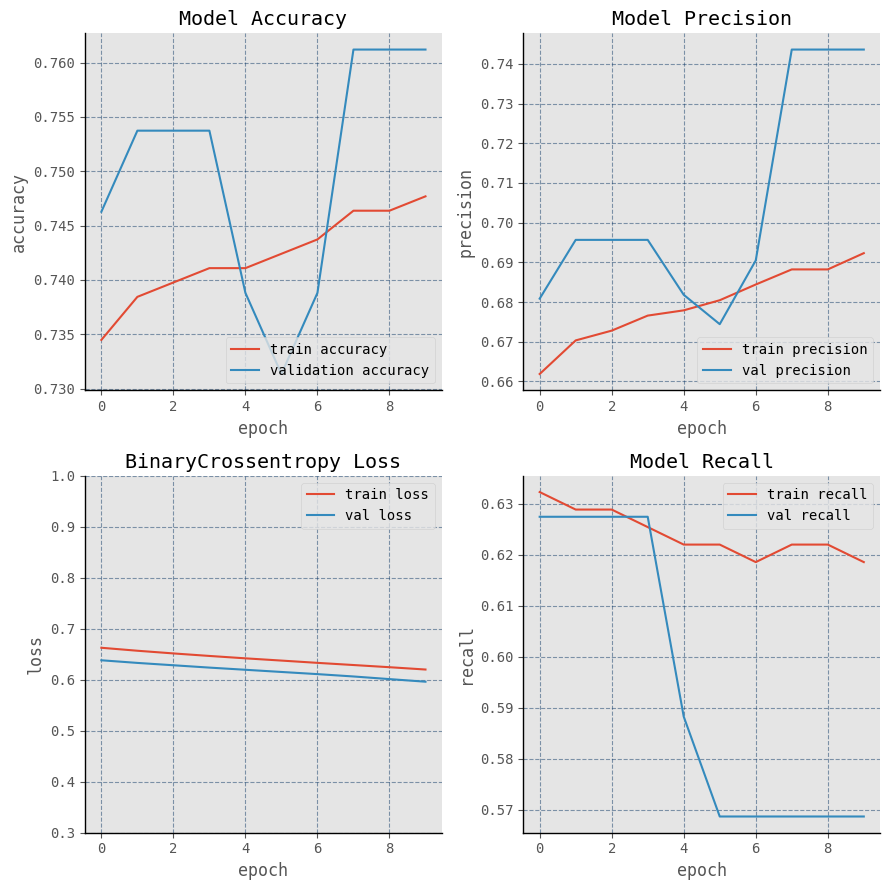

In [53]:
print(history.history.keys())
fig, axs = plt.subplots(2, 2, figsize=(9, 9))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

ax1 = axs[0][0]
ax1.set_title("Model Accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy")
ax1.plot(acc, label='train accuracy')
ax1.plot(val_acc, label='validation accuracy')
ax1.legend(loc="lower right")


loss = history.history['loss']
val_loss = history.history['val_loss']

ax2 = axs[1][0]
ax2.set_title("BinaryCrossentropy Loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("loss")
ax2.plot(loss, label='train loss')
ax2.plot(val_loss, label='val loss')
ax2.legend(loc="upper right")
ax2.set_ylim([0.3, 1.0])

precision = history.history['precision']
val_precision = history.history['val_precision']

ax3 = axs[0][1]
ax3.set_title("Model Precision")
ax3.set_xlabel("epoch")
ax3.set_ylabel("precision")
ax3.plot(precision, label='train precision')
ax3.plot(val_precision, label='val precision')
ax3.legend(loc="lower right")

recall = history.history['recall']
val_recall = history.history['val_recall']

ax4 = axs[1][1]
ax4.set_title("Model Recall")
ax4.set_xlabel("epoch")
ax4.set_ylabel("recall")
ax4.plot(recall, label='train recall')
ax4.plot(val_recall, label='val recall')
ax4.legend()

plt.tight_layout()
plt.show()


#FINAL SUBMISSION 

##Model Loading

In [133]:
final_model = tf.keras.models.load_model("final_model/model_epoch_268_precision_0.90_acc_0.87_.h5")
final_model.trainable = False
final_model.summary()



Model: "Prototype_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 9)]               0         
                                                                 
 normalization_layer (Normal  (None, 9)                19        
 ization)                                                        
                                                                 
 dense_1st (Dense)           (None, 8)                 80        
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 108
Trainable params: 0
Non-trainable params: 108
_________________________________________________________________


In [55]:
test_tensor = create_data_frame(test_table)
test_tensor.fillna(0, inplace=True)

In [56]:
test_tensor.head(900)

,Sex,Fare,Has_cabin,Age,Young_Age,Pclass,Parch,Dec,Position
0,1.0,7.828125,0.0,34.5,0.0,3.0,0.0,-1.0,-1.0
1,0.0,7.000000,0.0,47.0,0.0,3.0,0.0,-1.0,-1.0
2,1.0,9.687500,0.0,62.0,0.0,2.0,0.0,-1.0,-1.0
3,1.0,8.664062,0.0,27.0,0.0,3.0,0.0,-1.0,-1.0
4,0.0,12.289062,0.0,22.0,0.0,3.0,1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...
413,1.0,8.046875,0.0,0.0,0.0,3.0,0.0,-1.0,-1.0
414,0.0,108.875000,1.0,39.0,0.0,1.0,0.0,5.0,105.0
415,1.0,7.250000,0.0,38.5,0.0,3.0,0.0,-1.0,-1.0
416,1.0,8.046875,0.0,0.0,0.0,3.0,0.0,-1.0,-1.0


In [118]:
final_data = final_model.predict(test_tensor)

14/14 [==============================] - 0s 5ms/step


In [141]:
output_list = list()
for index, data in enumerate(final_data):
    passenger_id = test_table['PassengerId'][index]
    output_list.append((passenger_id, 1 if data[0] > 0.5 else 0))
print(output_list)

[(892, 0), (893, 0), (894, 0), (895, 0), (896, 0), (897, 0), (898, 0), (899, 0), (900, 1), (901, 0), (902, 0), (903, 0), (904, 1), (905, 0), (906, 1), (907, 1), (908, 0), (909, 0), (910, 0), (911, 0), (912, 0), (913, 0), (914, 1), (915, 0), (916, 1), (917, 0), (918, 1), (919, 0), (920, 0), (921, 0), (922, 0), (923, 0), (924, 0), (925, 0), (926, 0), (927, 0), (928, 1), (929, 1), (930, 0), (931, 0), (932, 0), (933, 1), (934, 0), (935, 1), (936, 1), (937, 0), (938, 0), (939, 0), (940, 1), (941, 0), (942, 0), (943, 0), (944, 1), (945, 1), (946, 0), (947, 0), (948, 0), (949, 0), (950, 0), (951, 1), (952, 0), (953, 0), (954, 0), (955, 1), (956, 0), (957, 1), (958, 1), (959, 0), (960, 0), (961, 0), (962, 1), (963, 0), (964, 0), (965, 0), (966, 1), (967, 0), (968, 0), (969, 1), (970, 0), (971, 1), (972, 0), (973, 1), (974, 0), (975, 0), (976, 0), (977, 0), (978, 0), (979, 1), (980, 1), (981, 1), (982, 1), (983, 0), (984, 1), (985, 0), (986, 0), (987, 0), (988, 1), (989, 0), (990, 1), (991, 0),

#SAVING RESULTS

In [142]:
import csv
with open('submission.csv', 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["PassengerId", "Survived"])

    for row in output_list:
        writer.writerow(row)

submission = pd.read_csv("submission.csv")
submission.head(900)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [143]:
!kaggle competitions submit -c titanic -f submission.csv -m "2nd attempt"

100% 3.18k/3.18k [00:01<00:00, 1.82kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

,PassengerId,Survived
0,892,1.0
1,893,1.0
2,894,1.0
3,895,1.0
4,896,1.0


In [137]:
gender_submission = pd.read_csv("gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,1.0
1,893,1.0
2,894,1.0
3,895,1.0
4,896,1.0
